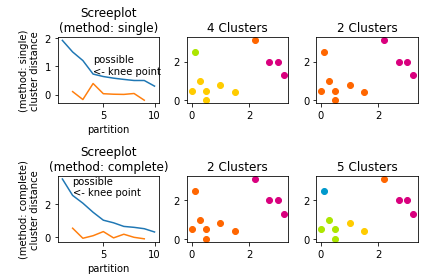

In [2]:
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array([[0.1,   2.5],
              [1.5,   .4 ],
              [0.3,   1  ],
              [1  ,   .8 ],
              [0.5,   0  ],
              [0  ,   0.5],
              [0.5,   0.5],
              [2.7,   2  ],
              [2.2,   3.1],
              [3  ,   2  ],
              [3.2,   1.3]])

fig, axes23 = plt.subplots(2, 3)

for method, axes in zip(['single', 'complete'], axes23):
    z = hac.linkage(a, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1], 
                       color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()

In [7]:
z

array([[ 7.        ,  9.        ,  0.3       ,  2.        ],
       [ 4.        ,  6.        ,  0.5       ,  2.        ],
       [ 2.        ,  5.        ,  0.58309519,  2.        ],
       [ 1.        ,  3.        ,  0.64031242,  2.        ],
       [10.        , 11.        ,  0.86023253,  3.        ],
       [12.        , 13.        ,  1.0198039 ,  4.        ],
       [14.        , 16.        ,  1.50332964,  6.        ],
       [ 8.        , 15.        ,  2.05912603,  4.        ],
       [ 0.        , 17.        ,  2.53179778,  7.        ],
       [18.        , 19.        ,  3.53553391, 11.        ]])